# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [38]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [39]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

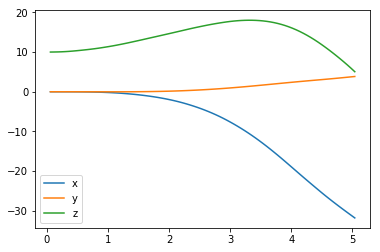

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

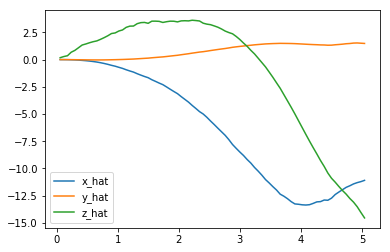

In [41]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

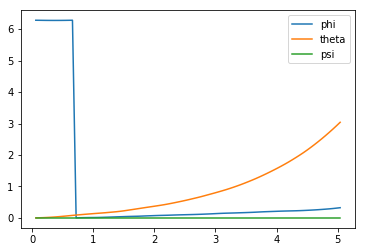

In [42]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

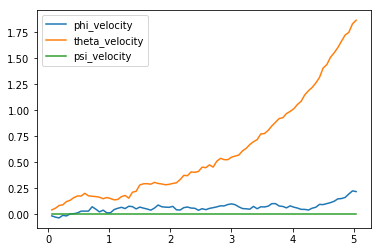

In [43]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

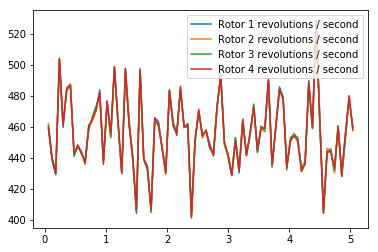

In [44]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [45]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-31.7989451    3.8444483    5.05374296   0.32424871   3.03928548
   0.        ]
[-11.09306098   1.4848546  -14.54368669]
[0.21824979 1.86512243 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [46]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 50
target_pos = np.array([0., 0., 150.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =   50, score =   2.834 (best =   3.388), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [47]:
## DONE: Train your agent here.
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task
import numpy as np
from random import random

import tensorflow as tf

np.random.seed(0)

time_limit = 20
num_episodes = 1000

# Flying from (x, y, z) = (0, 100, 0) upwards
init_pose = np.array([0., 0., 100., 0., 0., 0.])
init_angle_velocities = np.array([0., 0., 0.])

task = Task(init_pose, init_velocities, init_angle_velocities, time_limit)
agent = DDPG(task)

all_episode_rewards = []
heights = []

In [48]:
for episode in range(1, num_episodes+1):
    state = agent.reset_episode()
    episode_reward = 0
    for i in range(time_limit):
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        episode_reward += reward
        if i == time_limit - 1:
            print("\rEpisode = {:4d}, score = {:7.3f}, best = {:7.3f}, total = {:7.3f}"\
                    .format(episode, agent.score, agent.best_score, episode_reward)
                  , end=" ")
            print(task.sim.pose[:3])
            sys.stdout.flush()
            all_episode_rewards.append(episode_reward)
            heights.append(task.sim.pose[2])
            break

Episode =    1, score =   0.000, best =    -inf, total = 5794.527 [ 4.31058225  3.11440673 96.68152721]
Episode =    2, score =   0.000, best =    -inf, total = 5794.527 [ 4.31058225  3.11440673 96.68152721]
Episode =    3, score =   0.000, best =    -inf, total = 5794.527 [ 4.31058225  3.11440673 96.68152721]
Episode =    4, score = 289.744, best = 304.728, total = 5794.876 [ 4.31335713  3.11782769 96.68687504]
Episode =    5, score = 289.825, best = 307.661, total = 5796.504 [ 4.29308862  3.13123899 96.71051236]
Episode =    6, score = 289.919, best = 307.662, total = 5798.375 [ 4.27112806  3.14395667 96.73766492]
Episode =    7, score = 290.025, best = 307.663, total = 5800.493 [ 4.24890606  3.15511515 96.76832694]
Episode =    8, score = 290.144, best = 307.665, total = 5802.876 [ 4.2255954   3.16379414 96.80274893]
Episode =    9, score = 290.275, best = 307.667, total = 5805.500 [ 4.20410645  3.1704276  96.84049259]
Episode =   10, score = 290.420, best = 307.671, total = 5808.39

Episode =   80, score = 307.715, best = 318.667, total = 6154.298 [  3.74070127   6.24644412 101.61115539]
Episode =   81, score = 308.016, best = 319.004, total = 6160.310 [  3.73714786   6.20938914 101.70133699]
Episode =   82, score = 308.882, best = 319.327, total = 6177.639 [  3.72219667   6.21929548 101.98297592]
Episode =   83, score = 309.130, best = 319.642, total = 6182.604 [  3.70926348   6.16876443 102.05329638]
Episode =   84, score = 309.481, best = 319.954, total = 6189.617 [  3.68905143   6.12358296 102.15718307]
Episode =   85, score = 309.665, best = 320.247, total = 6193.303 [  3.70105      6.07141551 102.20372589]
Episode =   86, score = 309.816, best = 320.533, total = 6196.319 [  3.69258597   6.02624681 102.23719553]
Episode =   87, score = 309.960, best = 320.824, total = 6199.207 [  3.67933032   5.98196528 102.26708721]
Episode =   88, score = 310.387, best = 321.106, total = 6207.748 [  3.67184346   5.93028512 102.39128172]
Episode =   89, score = 310.479, best

Episode =  157, score = 328.226, best = 342.663, total = 6564.514 [  3.48516356  13.46511228 105.47832258]
Episode =  158, score = 328.814, best = 342.984, total = 6576.276 [  3.48129629  13.56436458 105.63990778]
Episode =  159, score = 329.368, best = 343.284, total = 6587.359 [  3.48394985  13.6609958  105.79215941]
Episode =  160, score = 329.948, best = 343.589, total = 6598.968 [  3.48686679  13.75881501 105.95248314]
Episode =  161, score = 330.554, best = 343.894, total = 6611.080 [  3.48299619  13.85178229 106.12105338]
Episode =  162, score = 331.178, best = 344.242, total = 6623.564 [  3.4781068   13.94197259 106.29560873]
Episode =  163, score = 331.805, best = 344.625, total = 6636.103 [  3.47609831  14.0306205  106.47152918]
Episode =  164, score = 332.419, best = 344.995, total = 6648.378 [  3.47860008  14.11801278 106.64401786]
Episode =  165, score = 333.002, best = 345.335, total = 6660.041 [  3.48070219  14.19612451 106.80879488]
Episode =  166, score = 333.584, best

Episode =  234, score = 369.044, best = 369.044, total = 7380.872 [  3.21232212  13.31902121 117.78855967]
Episode =  235, score = 369.456, best = 369.456, total = 7389.110 [  3.20401371  13.23127273 117.92052201]
Episode =  236, score = 370.071, best = 370.071, total = 7401.413 [  3.19439149  13.08127053 118.11695718]
Episode =  237, score = 370.597, best = 370.597, total = 7411.931 [  3.1850746   12.95058716 118.28523145]
Episode =  238, score = 371.075, best = 371.075, total = 7421.494 [  3.17593192  12.83001249 118.4385138 ]
Episode =  239, score = 371.541, best = 371.541, total = 7430.810 [  3.1668879   12.70853969 118.58798607]
Episode =  240, score = 371.992, best = 371.992, total = 7439.841 [  3.15745246  12.58699433 118.73302628]
Episode =  241, score = 372.411, best = 372.411, total = 7448.220 [  3.1478463   12.47301153 118.86784345]
Episode =  242, score = 372.815, best = 372.815, total = 7456.294 [  3.13825125  12.36050356 118.99790372]
Episode =  243, score = 373.223, best

Episode =  311, score = 384.777, best = 384.777, total = 7695.530 [  2.28698467   5.41371714 122.89652363]
Episode =  312, score = 384.804, best = 384.804, total = 7696.081 [  2.27663637   5.34777079 122.90542534]
Episode =  313, score = 384.828, best = 384.828, total = 7696.570 [  2.26674003   5.28664326 122.91332152]
Episode =  314, score = 384.852, best = 384.852, total = 7697.044 [  2.25681982   5.22455339 122.92097301]
Episode =  315, score = 384.874, best = 384.874, total = 7697.487 [  2.24706249   5.16395708 122.92811495]
Episode =  316, score = 384.895, best = 384.895, total = 7697.904 [  2.23730058   5.10431815 122.93482193]
Episode =  317, score = 384.915, best = 384.915, total = 7698.303 [  2.22765191   5.04450974 122.94123654]
Episode =  318, score = 384.933, best = 384.933, total = 7698.661 [  2.21835302   4.9882855  122.94697785]
Episode =  319, score = 384.950, best = 384.950, total = 7699.000 [  2.20916076   4.93230795 122.95240528]
Episode =  320, score = 384.966, best

Episode =  388, score = 385.048, best = 385.128, total = 7700.960 [  1.80975363   2.74325085 122.97675805]
Episode =  389, score = 385.045, best = 385.128, total = 7700.905 [  1.80624893   2.72604555 122.97577547]
Episode =  390, score = 385.042, best = 385.128, total = 7700.849 [  1.80279422   2.70879897 122.97476961]
Episode =  391, score = 385.040, best = 385.128, total = 7700.791 [  1.79931702   2.6912101  122.97373961]
Episode =  392, score = 385.037, best = 385.128, total = 7700.734 [  1.79582927   2.67398333 122.97272348]
Episode =  393, score = 385.034, best = 385.128, total = 7700.678 [  1.79248118   2.65735859 122.97172776]
Episode =  394, score = 385.031, best = 385.128, total = 7700.621 [  1.78917804   2.64092798 122.97072693]
Episode =  395, score = 385.028, best = 385.128, total = 7700.565 [  1.78586012   2.62467295 122.96973134]
Episode =  396, score = 385.025, best = 385.128, total = 7700.510 [  1.78268647   2.60893035 122.9687569 ]
Episode =  397, score = 385.023, best

Episode =  465, score = 384.870, best = 385.128, total = 7697.402 [  1.62183092   1.85159765 122.91419845]
Episode =  466, score = 384.868, best = 385.128, total = 7697.370 [  1.62017746   1.84454298 122.91363061]
Episode =  467, score = 384.867, best = 385.128, total = 7697.335 [  1.61846597   1.83732829 122.91303375]
Episode =  468, score = 384.864, best = 385.128, total = 7697.290 [  1.61630627   1.82825977 122.91224038]
Episode =  469, score = 384.862, best = 385.128, total = 7697.238 [  1.61392392   1.81770723 122.91133796]
Episode =  470, score = 384.859, best = 385.128, total = 7697.187 [  1.61152011   1.80732355 122.91045789]
Episode =  471, score = 384.857, best = 385.128, total = 7697.139 [  1.60921544   1.79750898 122.90961779]
Episode =  472, score = 384.855, best = 385.128, total = 7697.094 [  1.60701913   1.78825026 122.90882841]
Episode =  473, score = 384.853, best = 385.128, total = 7697.050 [  1.60497568   1.77933936 122.90807243]
Episode =  474, score = 384.850, best

Episode =  542, score = 384.776, best = 385.128, total = 7695.510 [  1.52642775   1.47601729 122.88131951]
Episode =  543, score = 384.775, best = 385.128, total = 7695.498 [  1.52575693   1.47359511 122.88110276]
Episode =  544, score = 384.774, best = 385.128, total = 7695.485 [  1.52505224   1.47111957 122.88087779]
Episode =  545, score = 384.774, best = 385.128, total = 7695.472 [  1.52435491   1.46869599 122.88065799]
Episode =  546, score = 384.773, best = 385.128, total = 7695.460 [  1.52363102   1.46627744 122.8804392 ]
Episode =  547, score = 384.772, best = 385.128, total = 7695.447 [  1.52295682   1.46396402 122.8802273 ]
Episode =  548, score = 384.772, best = 385.128, total = 7695.435 [  1.52231657   1.4616767  122.88001934]
Episode =  549, score = 384.771, best = 385.128, total = 7695.423 [  1.52164647   1.45933074 122.87980953]
Episode =  550, score = 384.771, best = 385.128, total = 7695.412 [  1.52100406   1.45709465 122.87960696]
Episode =  551, score = 384.770, best

Episode =  619, score = 384.742, best = 385.128, total = 7694.850 [  1.48798523   1.3515579  122.86984836]
Episode =  620, score = 384.742, best = 385.128, total = 7694.844 [  1.4876582    1.35056338 122.86975515]
Episode =  621, score = 384.742, best = 385.128, total = 7694.839 [  1.48726163   1.3495249  122.86965655]
Episode =  622, score = 384.742, best = 385.128, total = 7694.834 [  1.48693805   1.34858033 122.86956984]
Episode =  623, score = 384.741, best = 385.128, total = 7694.828 [  1.48660051   1.34760984 122.8694757 ]
Episode =  624, score = 384.741, best = 385.128, total = 7694.823 [  1.48633367   1.34657787 122.86938099]
Episode =  625, score = 384.741, best = 385.128, total = 7694.818 [  1.48603246   1.34559242 122.86929427]
Episode =  626, score = 384.741, best = 385.128, total = 7694.813 [  1.4857048    1.34465206 122.86920398]
Episode =  627, score = 384.740, best = 385.128, total = 7694.808 [  1.48536432   1.34376396 122.86911828]
Episode =  628, score = 384.740, best

Episode =  696, score = 384.728, best = 385.128, total = 7694.563 [  1.46959876   1.29888572 122.8648692 ]
Episode =  697, score = 384.728, best = 385.128, total = 7694.560 [  1.46942417   1.29845058 122.86482614]
Episode =  698, score = 384.728, best = 385.128, total = 7694.558 [  1.4692575    1.29800612 122.86478075]
Episode =  699, score = 384.728, best = 385.128, total = 7694.556 [  1.46913522   1.29757192 122.86474611]
Episode =  700, score = 384.728, best = 385.128, total = 7694.553 [  1.46891335   1.29715763 122.86469787]
Episode =  701, score = 384.728, best = 385.128, total = 7694.551 [  1.46878989   1.29672948 122.86466014]
Episode =  702, score = 384.727, best = 385.128, total = 7694.549 [  1.46860691   1.2963515  122.86461877]
Episode =  703, score = 384.727, best = 385.128, total = 7694.547 [  1.46848588   1.2959446  122.86458577]
Episode =  704, score = 384.727, best = 385.128, total = 7694.544 [  1.46834714   1.29554006 122.86454488]
Episode =  705, score = 384.727, best

Episode =  773, score = 384.722, best = 385.128, total = 7694.433 [  1.46063978   1.27543621 122.862613  ]
Episode =  774, score = 384.722, best = 385.128, total = 7694.432 [  1.46058375   1.27525504 122.86259903]
Episode =  775, score = 384.722, best = 385.128, total = 7694.431 [  1.4605001    1.27503174 122.86257678]
Episode =  776, score = 384.722, best = 385.128, total = 7694.430 [  1.46046481   1.27485562 122.86256094]
Episode =  777, score = 384.721, best = 385.128, total = 7694.429 [  1.46036986   1.27466637 122.86254067]
Episode =  778, score = 384.721, best = 385.128, total = 7694.428 [  1.46027413   1.2744756  122.86252358]
Episode =  779, score = 384.721, best = 385.128, total = 7694.427 [  1.46024828   1.27427431 122.86250692]
Episode =  780, score = 384.721, best = 385.128, total = 7694.426 [  1.46014971   1.27410408 122.86248762]
Episode =  781, score = 384.721, best = 385.128, total = 7694.425 [  1.46004802   1.27388365 122.86246598]
Episode =  782, score = 384.721, best

Episode =  850, score = 384.719, best = 385.128, total = 7694.375 [  1.45671086   1.26469568 122.86160314]
Episode =  851, score = 384.719, best = 385.128, total = 7694.375 [  1.45666211   1.26458889 122.86159408]
Episode =  852, score = 384.719, best = 385.128, total = 7694.374 [  1.45663525   1.26456176 122.86159107]
Episode =  853, score = 384.719, best = 385.128, total = 7694.374 [  1.45660841   1.26447584 122.86158192]
Episode =  854, score = 384.719, best = 385.128, total = 7694.373 [  1.45657207   1.26438529 122.86157348]
Episode =  855, score = 384.719, best = 385.128, total = 7694.373 [  1.45648902   1.26429681 122.86156313]
Episode =  856, score = 384.719, best = 385.128, total = 7694.372 [  1.45647772   1.26419437 122.86155645]
Episode =  857, score = 384.719, best = 385.128, total = 7694.372 [  1.4564673    1.26410186 122.86155017]
Episode =  858, score = 384.719, best = 385.128, total = 7694.372 [  1.45645157   1.26405897 122.86154386]
Episode =  859, score = 384.719, best

Episode =  927, score = 384.718, best = 385.128, total = 7694.350 [  1.45483995   1.26015949 122.86117012]
Episode =  928, score = 384.717, best = 385.128, total = 7694.350 [  1.45479895   1.26006827 122.86116361]
Episode =  929, score = 384.717, best = 385.128, total = 7694.350 [  1.45479724   1.26006038 122.86116219]
Episode =  930, score = 384.717, best = 385.128, total = 7694.350 [  1.45479186   1.2600049  122.86115935]
Episode =  931, score = 384.717, best = 385.128, total = 7694.349 [  1.45475157   1.25994509 122.86115183]
Episode =  932, score = 384.717, best = 385.128, total = 7694.349 [  1.45474272   1.25991702 122.861148  ]
Episode =  933, score = 384.717, best = 385.128, total = 7694.349 [  1.45473711   1.25987198 122.86114475]
Episode =  934, score = 384.717, best = 385.128, total = 7694.349 [  1.4546839    1.25985289 122.86114058]
Episode =  935, score = 384.717, best = 385.128, total = 7694.348 [  1.4546779    1.25980769 122.86113683]
Episode =  936, score = 384.717, best

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

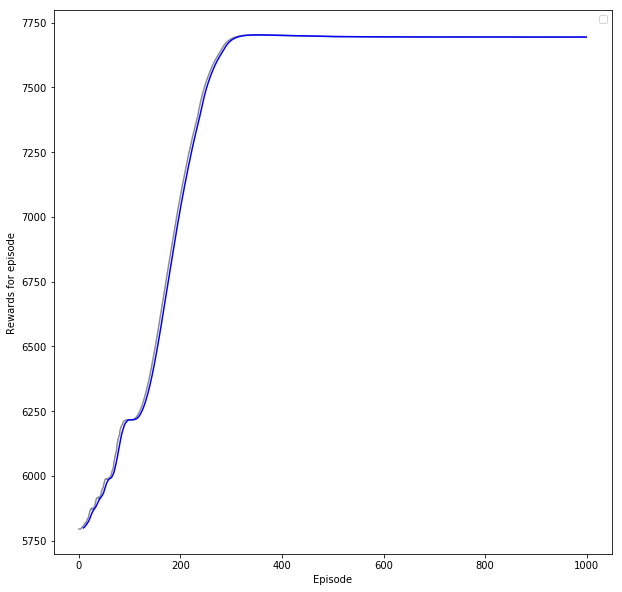

In [49]:
# DONE: Plot the rewards.
%matplotlib inline
import matplotlib.pyplot as plt

def moving_average (values, periods):
    """ Calculate the moving average"""
    weights = np.repeat(1.0, periods) / periods
    ma = np.convolve(values, weights, 'valid')
    return ma

def plot_rewards(rewards, moving_average_periods, ylabel):
    """ Generate a plot for the rewards and the moving average"""
    plt.figure().set_size_inches(10, 10)
    plt.xlabel('Episode')
    plt.ylabel(ylabel)
    plt.legend(['Reward', 'Moving average over ' + str(moving_average_periods) + ' periods'])
    indices = np.arange(len(rewards))
    np_rewards = np.array(rewards)
    plt.plot(indices, np_rewards, color='grey', alpha=0.9)
    averaged = moving_average(np_rewards, moving_average_periods)
    plt.plot(indices[moving_average_periods - 1:], averaged, color='blue')
    plt.show()

plot_rewards(all_episode_rewards, moving_average_periods=10, ylabel='Rewards for episode')


## Position as funtion of time

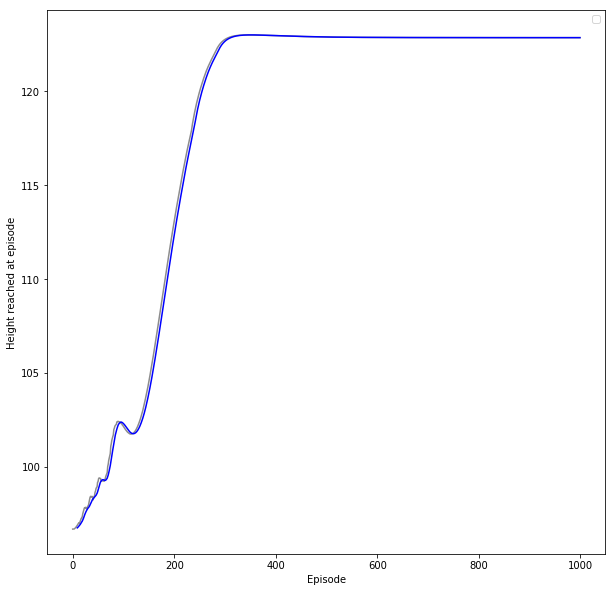

In [50]:
plot_rewards(heights, moving_average_periods=10, ylabel='Height reached at episode')

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
#### Task:
After my previous submission the reviewer suggested that I try the takeoff task so I am flying from (x,y,z) = (0., 0., 100.) upward. 
#### Reward:
The reward function is mostly based on the height of the quadcopter and velocity in the z direction. This is calulated by 
```
reward += alphaP * (self.sim.pose[2])
reward += alphaV * (self.sim.v[2])
```
I also tried to penalize movement in the x an y direction as well as angular velocities. However I found that this had no noticable effect on the learning of the agent so I disabled that again.
```
#reward += alphaP * (1 - np.linalg.norm(self.sim.pose[:2] - [0., 0.]))
# Penalise sideways (x,y) velocity
#reward += alphaV * (1 - np.linalg.norm(self.sim.v[:2] - [0., 0.]))
# Penalise angular velocity
#reward += alphaA * (1 - np.linalg.norm(self.sim.angular_v - [0., 0., 0.]))
```

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I went with the DDPG actor-critic method. It was the first choice from the start. Mainly because there were five pages about actor critic DDPG agent mainbuffer and ounoise in the project description, which I took as a hint that Udacity wanted me to go with DDPG.
I tried batch normalization, dropout, adding extra hidden layers and so on. These attepts didn't get me a higher reward or a faster learning rate so I reverted back to the actor and critic that was given by udacity. The only change I made in Actor and critic was in the optimizer I had set the value quite low
```
# Define optimizer and training function
optimizer = optimizers.Adam(lr=1e-6)

```
This made a huge improvement in the learning proces.

As mentioned above I went with the given actor and critic. As can be seen in the agents/actor.py file the model consists of 3 dense layers wich are ReLU activated. This is follwed with layer with a sigmoid activation function to normalize from 0 to 1. Finally a keras lambda layer re-normalizes the actions to the expected action range.

The agents/critic.py file shows that the critic includes a separate state and action neural nets, which are then combined to capture the joint state for making the model output.



**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

The task I choose for this submission was easy to learn. The reward curve went straigth up wit only minor slowdowns.

Well I definately had e learning curve in this project with multiple aha moments. however I assume the agent is meant in this question. For this final task shown above the learning proces was gradual. the agent learned in about 275 episodes. 

The final performance is 7694 per episode.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

At first I was very enthousiastic and thought of a complex flight path. That did not work out so well. So the reviewer suggested I simplified to a takeoff task. The most time consuming part is to get all the parameters right.
What I think most interesting is how smooth the final reward curve is. I have plotted a smooth moving average of 10 episodes. But that was not really needed as the original showed hardly no noice.